In [1]:
import pandas as pd
import numpy as np
import scipy as ss
import scipy.stats as ss
from scipy.stats import norm

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import math
import seaborn as sns

import scipy.stats as ss
from scipy.stats import norm
import scipy.optimize as so
from scipy.optimize import fsolve
from scipy.integrate import odeint
from scipy import sparse

from scipy.sparse import diags

In [202]:
from matplotlib import pyplot
L=2*np.pi
nx=5 #21 works with dt=10e-6
x = np.linspace(0,L,nx)
dx = L/(nx-1) #the entire grid is 2 units
nt = 30
t = np.linspace(0,0.5,nt)
dt = 10e-3
u = 2*np.sin(np.pi/2*x)*np.exp(-np.pi**2/16 *0)-np.sin(np.pi*x)*np.exp(-np.pi**2/4*0)-np.sin(2*np.pi*x)*np.exp(-np.pi**2*0) #setting the initial condition

alpha=1/4

c = 1 #assumed wavespeed
sigmaa = 0.5
    


ufull=np.zeros([nx,nt]) #ufull
print(t.shape)

(30,)


In [203]:
# for n in range(nt):
    
#     un = u.copy() #copy existing values of u into un
#     for i in range (1, nx-1):
#     #for i in range(nx): #see what happens
#         u[i]= alpha*(un[i-1]-2*un[i]+un[i+1])/dx**2 *dt + un[i]
#         u[0]=alpha*(un[nx-2]-2*un[0]+un[1])/dx**2 *dt + un[0]
#         u[nx-1]= u[0]
#         #print(i)


    
#     #u=np.nan_to_num(u) 
   
#     #print(u)
#     ufull[:,n]=u
#      #all rows, nth timestep or all columns, ith space step
# plt.plot(x, 2*np.sin(np.pi/2*x)*np.exp(-np.pi**2/16 *(nt-1)*dt)-np.sin(np.pi*x)*np.exp(-np.pi**2/4*(nt-1)*dt)-np.sin(2*np.pi*x)*np.exp(-np.pi**2*(nt-1)*dt),'r')
# plt.plot(x, ufull[:,nt-1]) #plot when t=3
# #print(ufull[:,3])

In [204]:
### coefficients ### 
AA=alpha*dt/2*dx**2 
BB=1+2*AA

main_diag = -BB*np.ones((1,nx-2)) #main diagonal consists of -BBs
#print(main_diag.shape[0]) 
#print(main_diag.shape[1]) 
off_diag = AA*np.ones((1, nx-3)) #lower and upper diagnonals are AAs
a = main_diag.shape[1] #the second index of shape, i.e. nx-2 (the bounds are not included)
diagonals = [main_diag, off_diag, off_diag]

    #Sparse Matrix diagonals
A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
print(AA)
print(BB)

1
3
0.0030842513753404246
1.0061685027506808


In [205]:
un = u.copy() #copy all the us into un one time before running the loop
import sys

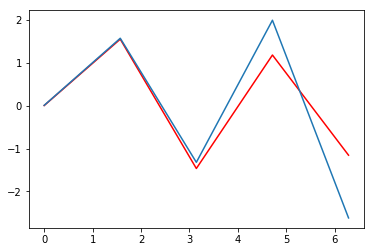

In [206]:
for n in range(nt):
    
    
    k=np.zeros([nx-2]) #A*U=K
    for i in range (2,nx-3):
        k[i]=-un[i]-AA*(un[i+1]-2*un[i]+un[i-1])
    k[1]=-un[1]-AA*(un[2]-2*un[1]+un[0])-AA*un[0] #the bounds affect the 1st and nx-3th index
    k[nx-3]=-un[nx-3]-AA*(un[nx-2]-2*un[nx-3]+un[nx-4])-AA*un[nx-1]

     
    

    u[0:nx-2]=np.dot(np.linalg.inv(A),k.T) #U= inverse of A * transpose of K
    
    #shifted if 1-nx-1
    un = u.copy()
 
    
    #u=np.nan_to_num(u) 
   
    #print(u)
    ufull[:,n]=u
    
     #all rows, nth timestep or all columns, ith space step
plt.plot(x, 2*np.sin(np.pi/2*x)*np.exp(-np.pi**2/16 *(nt-1)*dt)-np.sin(np.pi*x)*np.exp(-np.pi**2/4*(nt-1)*dt)-np.sin(2*np.pi*x)*np.exp(-np.pi**2*(nt-1)*dt),'r')
plt.plot(x, ufull[:,nt-1]) #plot when t=3
#print(ufull)
#print(ufull[:,3])

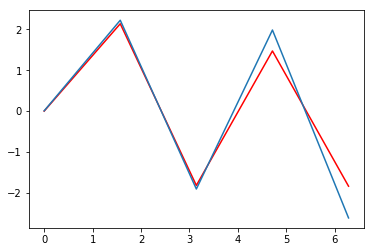

In [209]:
tFinal = 9
plt.plot(x, 2*np.sin(np.pi/2*x)*np.exp(-np.pi**2/16 *tFinal*dt)-np.sin(np.pi*x)*np.exp(-np.pi**2/4*tFinal*dt)-np.sin(2*np.pi*x)*np.exp(-np.pi**2*tFinal*dt),'r')

plt.plot(x, ufull[:,tFinal]) #plot when t=3

In [180]:
k=np.zeros(nx-3)
print(k[nx-4])

0.0


In [44]:
c=np.dot(A,[[2],[3]])
c

array([[ 5],
       [10]])

In [59]:
np.linalg.cond(A)

1.0000000099211459e+192

In [110]:
AA=alpha*dt/2*dx**2
BB=0+0*AA
main_diag = -BB*np.ones((1,nx-2))
off_diag = AA*np.ones((1, nx-3))
a = main_diag.shape[1]
diagonals = [main_diag, 10**(-8)*off_diag, off_diag]

    #Sparse Matrix diagonals
A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
print(A.shape)

(48, 48)
